In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [42]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.dropna()
df = df.drop(["id"], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Basic Statistics

In [47]:
df[df['stroke'] == 1].drop(['stroke'], axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,67.712919,0.287081,0.191388,134.571388,30.471292
std,12.402848,0.453486,0.394338,62.462047,6.329452
min,14.000000,0.000000,0.000000,56.110000,16.900000
25%,58.000000,0.000000,0.000000,80.430000,26.400000
50%,70.000000,0.000000,0.000000,106.580000,29.700000
75%,78.000000,1.000000,0.000000,196.920000,33.700000
max,82.000000,1.000000,1.000000,271.740000,56.600000


In [48]:
df[df['stroke'] == 0].drop(['stroke'], axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4700.000000,4700.000000,4700.000000,4700.000000,4700.000000
mean,41.760451,0.083191,0.043191,104.003736,28.823064
std,22.268129,0.276201,0.203310,42.997798,7.908287
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,24.000000,0.000000,0.000000,76.887500,23.400000
50%,43.000000,0.000000,0.000000,91.210000,28.000000
75%,59.000000,0.000000,0.000000,112.432500,33.100000
max,82.000000,1.000000,1.000000,267.760000,97.600000


## Outlier Analysis

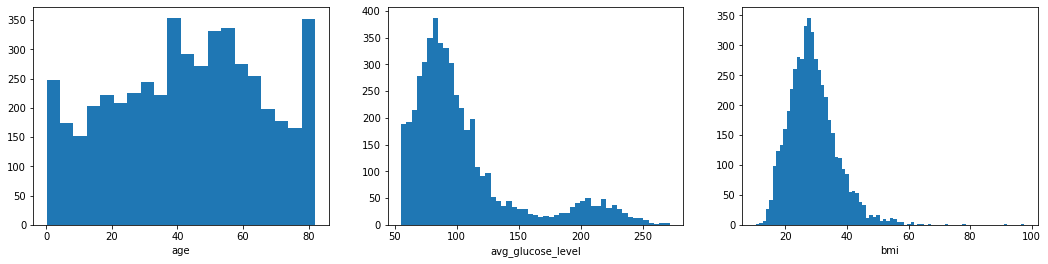

In [70]:
fig=plt.figure(figsize=(18,4))
for i, item in enumerate(['age', 'avg_glucose_level', 'bmi']):
    fig.add_subplot(1, 3, i+1)
    plt.hist(df[item], bins='auto')
    plt.xlabel(item)

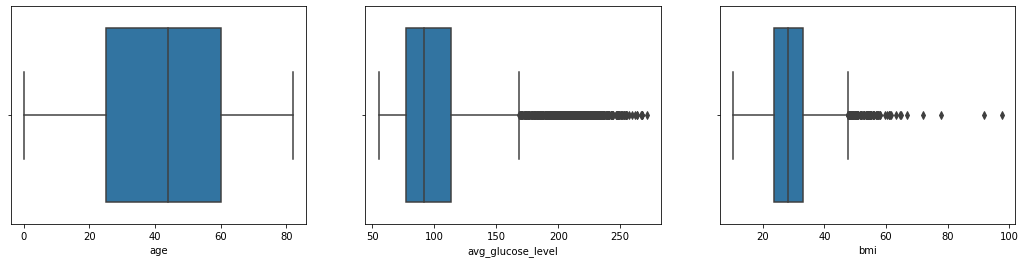

In [61]:
fig=plt.figure(figsize=(18,4))
for i, item in enumerate(['age', 'avg_glucose_level', 'bmi']):
    fig.add_subplot(1, 3, i+1)
    sns.boxplot(x=df[item])

## Univariate Analysis

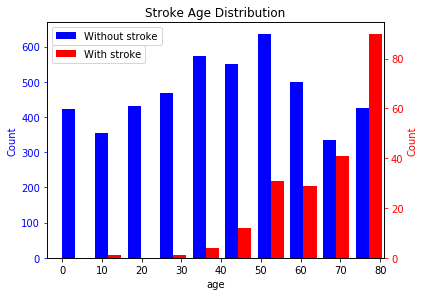

In [159]:
x = df[df['stroke'] == 0]['age']
y = df[df['stroke'] == 1]['age']
colors = ['b','r']

#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([x, y], color=colors)
n, bins, patches = ax1.hist([x,y])
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0], label='Without stroke')
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1], label='With stroke')

#finishes the plot
ax1.set_ylabel("Count", color=colors[0])
ax1.set_xlabel("age")
ax2.set_ylabel("Count", color=colors[1])
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.925))
plt.tight_layout()
plt.title('Stroke Age Distribution')
plt.show()

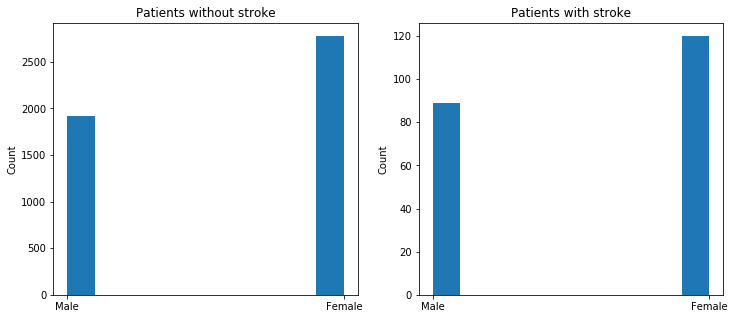

In [153]:
x = df[df['stroke'] == 0]['gender']
x = x[x!='Other']
y = df[df['stroke'] == 1]['gender']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
# fig.suptitle('Horizontally stacked subplots')
ax1.hist(x)
ax1.set_title('Patients without stroke')
ax1.set_ylabel("Count")
ax2.hist(y)
ax2.set_title('Patients with stroke')
ax2.set_ylabel("Count")
plt.show()

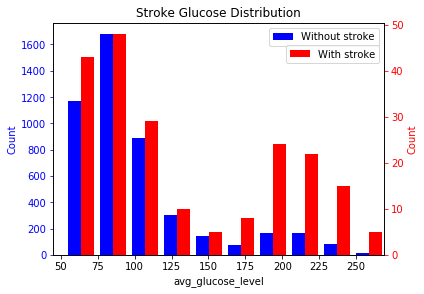

In [161]:
x = df[df['stroke'] == 0]['avg_glucose_level']
y = df[df['stroke'] == 1]['avg_glucose_level']
colors = ['b','r']

#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([x, y], color=colors)
n, bins, patches = ax1.hist([x,y])
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0], label='Without stroke')
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1], label='With stroke')

#finishes the plot
ax1.set_ylabel("Count", color=colors[0])
ax1.set_xlabel("avg_glucose_level")
ax2.set_ylabel("Count", color=colors[1])
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.925))
plt.tight_layout()
plt.title('Stroke Glucose Distribution')
plt.show()

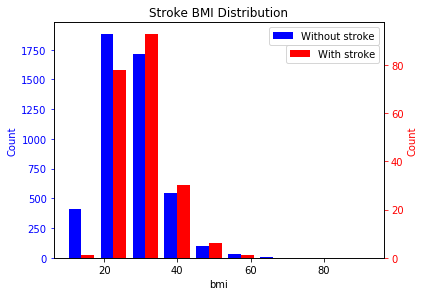

In [162]:
x = df[df['stroke'] == 0]['bmi']
y = df[df['stroke'] == 1]['bmi']
colors = ['b','r']

#sets up the axis and gets histogram data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([x, y], color=colors)
n, bins, patches = ax1.hist([x,y])
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0], label='Without stroke')
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1], label='With stroke')

#finishes the plot
ax1.set_ylabel("Count", color=colors[0])
ax1.set_xlabel("bmi")
ax2.set_ylabel("Count", color=colors[1])
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.925))
plt.tight_layout()
plt.title('Stroke BMI Distribution')
plt.show()

## Bivariate Analysis

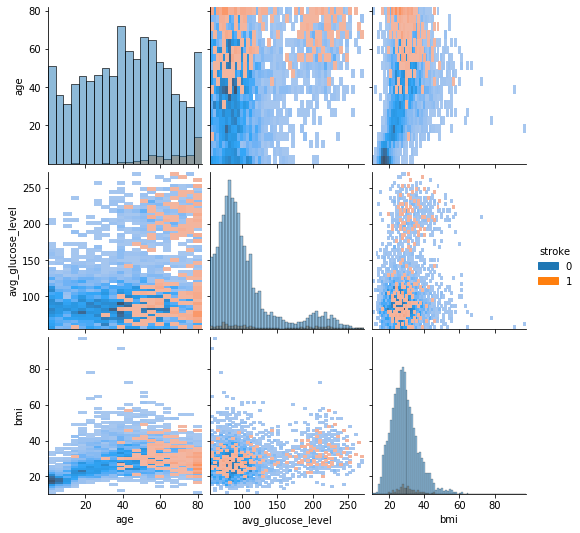

In [175]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], 
             hue='stroke', 
             kind='hist')
plt.show()

## Feature Correlation

In [194]:
def categorical2dummy(df):
    df_encoded = df.copy()
    labelencoder = dict()
    categorical_col = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    # Convert categorical variables to numerical variables
    for feature in categorical_col:
        labelencoder[feature] = preprocessing.LabelEncoder()
        df_encoded[feature+'_n'] = labelencoder[feature].fit_transform(df_encoded[feature])
    df_encoded = df_encoded.drop(categorical_col, axis=1)
    return df_encoded

In [195]:
df_encoded = categorical2dummy(df)
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,ever_married_n,work_type_n,Residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,4,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,3,1,2
5107,35.0,0,0,82.99,30.6,0,0,1,3,0,2
5108,51.0,0,0,166.29,25.6,0,1,1,2,0,1


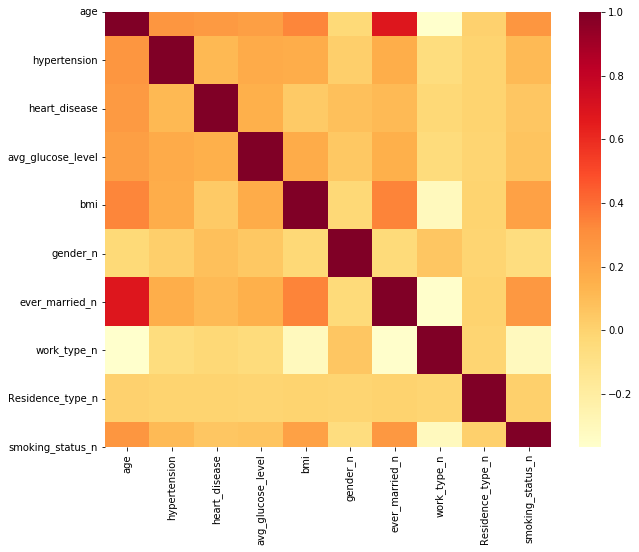

In [207]:
plt.figure(figsize=(10,8))
cormat = df_encoded.drop(['stroke'], axis=1).corr()
sns.heatmap(cormat, cmap='YlOrRd')
plt.show()

## Model Prediction

In [292]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier

In [208]:
df_encoded = categorical2dummy(df)
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_n,ever_married_n,work_type_n,Residence_type_n,smoking_status_n
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,4,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,3,1,2
5107,35.0,0,0,82.99,30.6,0,0,1,3,0,2
5108,51.0,0,0,166.29,25.6,0,1,1,2,0,1


See ``server.py`` for more details in model inplementation.